In [83]:
import pandas as pd
import copy 

from Chapter3.OutlierDetection import DistributionBasedOutlierDetection

from util.VisualizeDataset import VisualizeDataset

dataset = pd.read_csv('dataset_gran_250.csv')


print(dataset.trial.unique())
print(dataset.id.unique())

[ 1.  2. 11.  3.  4. 12.  7.  8. 15.  9. 16.  6. 14.  5. 13.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]


In [84]:
# Visual inspection seems to show everything within a normal range
# for col in dataset.columns:
#     plt.figure()
#     plt.title("Granularity 250 ms" + col)
#     dataset[col].hist()
#     plt.show()

In [85]:
dist_detection = DistributionBasedOutlierDetection()

trials = [dataset[dataset['trial']==i] for i in dataset.trial.unique()]

for tt in trials:
    print(tt.size)

84609
99498
38010
97965
119595
47313
266805
202503
109872
175497
50463
377916
137298
394443
175119


In [86]:
# only impute outliers for sensor-measured columns
columns = ['attitude.roll', 'attitude.pitch', 'attitude.yaw',
       'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z',
       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
       'rotationRate.y', 'rotationRate.z']

try:
    outlier_df = pd.read_csv('dataset_outliers_imputed.csv')
except FileNotFoundError:
    print('File not found.. Generating outliers')
    outlier_df = copy.deepcopy(dataset)
    
    for col in columns:
        dist_detection.chauvenet(outlier_df, col)
        print("this col is done: ", col)
    print('All done, saving for future usage')
    
    outlier_df.to_csv('dataset_outliers_imputed.csv')
    
print(outlier_df.columns)

File not found.. Generating outliers
0         1.115102
1         0.832973
2         1.122985
3         1.203272
4         0.992189
            ...   
113181    1.488623
113182    1.488256
113183    1.488400
113184    1.489169
113185    1.488491
Name: attitude.roll, Length: 113186, dtype: float64
attitude.roll
this col is done:  attitude.roll
0         0.583884
1         0.654264
2         0.317801
3         0.373067
4         0.459992
            ...   
113181    1.234978
113182    1.237097
113183    1.236307
113184    1.236136
113185    1.235839
Name: attitude.pitch, Length: 113186, dtype: float64
attitude.pitch
this col is done:  attitude.pitch
0         0.560940
1         0.464817
2         0.691775
3         0.722151
4         0.755591
            ...   
113181    0.041514
113182    0.041792
113183    0.041924
113184    0.041777
113185    0.041980
Name: attitude.yaw, Length: 113186, dtype: float64
attitude.yaw
this col is done:  attitude.yaw
0         0.585135
1         1.193072
2

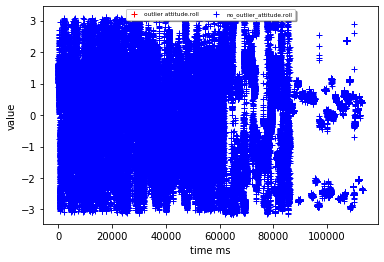

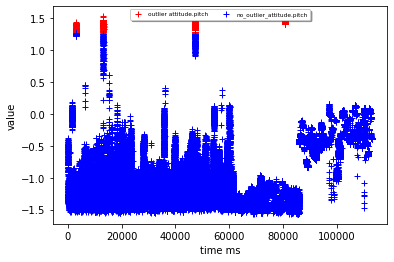

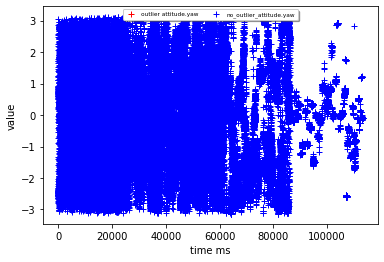

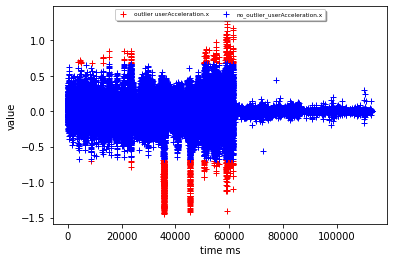

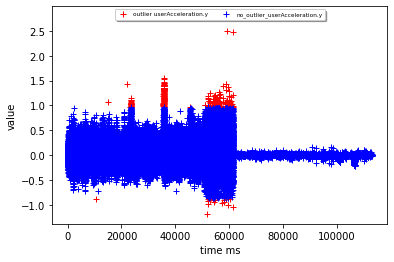

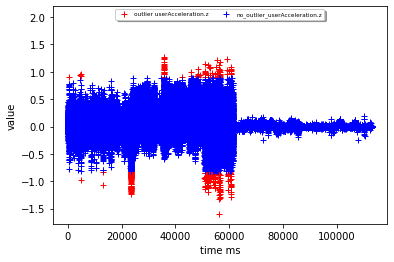

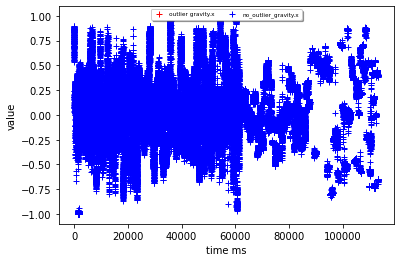

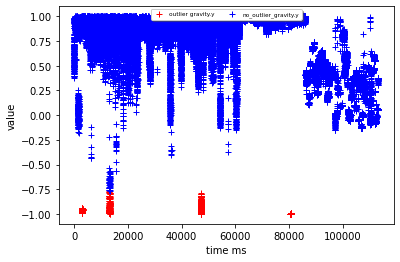

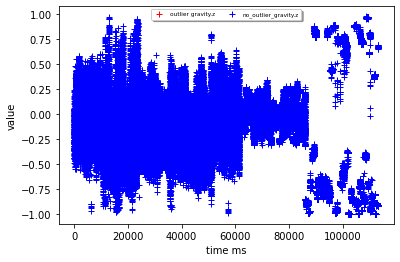

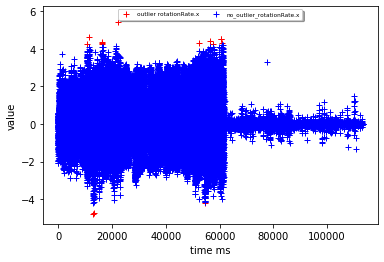

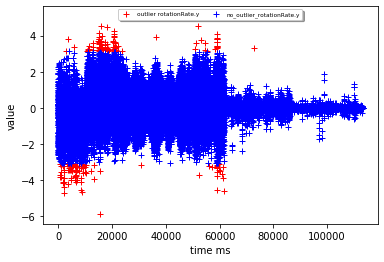

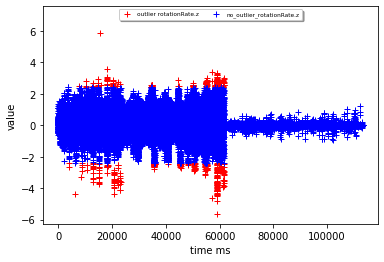

In [87]:
vis = VisualizeDataset()

for col in columns:
    vis.plot_binary_outliers(outlier_df, col, col + '_outlier')

# impute missing values

In [89]:
display(outlier_df.describe())
print(outlier_df.columns)

Unnamed: 0  attitude.roll  attitude.pitch   attitude.yaw  \
count  113186.000000  113186.000000   113186.000000  113186.000000   
mean    59724.252558      -0.175937       -0.986736      -0.149128   
std     51884.357213       1.473105        0.489813       1.423758   
min         0.000000      -3.140731       -1.566813      -3.140410   
25%     19750.000000      -1.394752       -1.347766      -1.215849   
50%     44500.000000       0.082338       -1.186205      -0.114155   
75%     86250.000000       0.859166       -0.634328       0.785611   
max    328250.000000       3.139792        1.529981       3.140133   

       userAcceleration.x  userAcceleration.y  userAcceleration.z  \
count       113186.000000       113186.000000       113186.000000   
mean            -0.003872            0.044286            0.039287   
std              0.147763            0.199536            0.186378   
min             -1.448202           -1.183898           -1.596738   
25%             -0.033034           -0.010482           -0.012714   
50%              0.000873            0.006415            0.005085   
75%              0.030925            0.091216            0.088551   
max              1.337906            2.794751            2.014296   

           gravity.x      gravity.y      gravity.z  ...  rotationRate.y  \
count  113186.000000  113186.000000  113186.000000  ...   113186.000000   
mean        0.042144       0.754788      -0.138825  ...        0.014520   
std         0.336458       0.331895       0.421722  ...        0.677423   
min        -0.998976      -0.999039      -0.999997  ...       -5.887341   
25%        -0.169744       0.589617      -0.381457  ...       -0.119788   
50%         0.020178       0.923567      -0.097866  ...        0.000223   
75%         0.268674       0.973216       0.076238  ...        0.169273   
max         0.996075       0.999991       0.977828  ...        5.072615   

       rotationRate.z            act             id         weight  \
count   113186.000000  113186.000000  113186.000000  113186.000000   
mean         0.012624       2.949119      11.471357      72.120810   
std          0.526288       1.644120       6.924883      15.980825   
min         -5.642336       0.000000       0.000000      48.000000   
25%         -0.061490       2.000000       6.000000      60.000000   
50%          0.000256       3.000000      12.000000      72.000000   
75%          0.078662       4.000000      18.000000      78.000000   
max          6.942180       5.000000      23.000000     102.000000   

              height            age         gender          trial  \
count  113186.000000  113186.000000  113186.000000  113186.000000   
mean      173.989610      28.832409       0.573693       7.574046   
std         8.798505       5.303769       0.494542       3.902364   
min       161.000000      18.000000       0.000000       1.000000   
25%       164.000000      25.000000       0.000000       5.000000   
50%       175.000000      28.000000       1.000000       7.000000   
75%       180.000000      31.000000       1.000000       9.000000   
max       190.000000      46.000000       1.000000      16.000000   

           timestamp  
count  113186.000000  
mean    59844.071087  
std     51884.284343  
min       120.000000  
25%     19870.000000  
50%     44620.000000  
75%     86370.000000  
max    328360.000000  

[8 rows x 21 columns]

Index(['Unnamed: 0', 'attitude.roll', 'attitude.pitch', 'attitude.yaw',
       'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z',
       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
       'rotationRate.y', 'rotationRate.z', 'act', 'id', 'weight', 'height',
       'age', 'gender', 'trial', 'timestamp', 'attitude.roll_outlier',
       'attitude.pitch_outlier', 'attitude.yaw_outlier',
       'userAcceleration.x_outlier', 'userAcceleration.y_outlier',
       'userAcceleration.z_outlier', 'gravity.x_outlier', 'gravity.y_outlier',
       'gravity.z_outlier', 'rotationRate.x_outlier', 'rotationRate.y_outlier',
       'rotationRate.z_outlier'],
      dtype='object')


In [94]:
from Chapter3.ImputationMissingValues import ImputationMissingValues
import itertools
import numpy as np

predictor_columns = ['attitude.roll', 'attitude.pitch', 'attitude.yaw',
                       'userAcceleration.x', 'userAcceleration.y', 'userAcceleration.z',
                       'gravity.x', 'gravity.y', 'gravity.z', 'rotationRate.x',
                       'rotationRate.y', 'rotationRate.z', 'attitude.roll_outlier',
                       'attitude.pitch_outlier', 'attitude.yaw_outlier',
                       'userAcceleration.x_outlier', 'userAcceleration.y_outlier',
                       'userAcceleration.z_outlier', 'gravity.x_outlier', 'gravity.y_outlier',
                       'gravity.z_outlier', 'rotationRate.x_outlier', 'rotationRate.y_outlier',
                       'rotationRate.z_outlier']

imp_helper = ImputationMissingValues()

imputed_df = copy.deepcopy(outlier_df)

print(outlier_df.trial.unique())
print(outlier_df.id.unique())

frames = []

for trial in outlier_df.trial.unique():
    for person in outlier_df.id.unique():
        print(f'Doing trial {trial} and person {person}')

        partdf = imputed_df[(imputed_df.id == person) & (imputed_df.trial == trial)]

        for col in predictor_columns:
            partdf = imp_helper.impute_interpolate(partdf, col)


[ 1.  2. 11.  3.  4. 12.  7.  8. 15.  9. 16.  6. 14.  5. 13.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23.]
Doing trial 1.0 and person 0.0
Doing trial 1.0 and person 1.0
Doing trial 1.0 and person 2.0
Doing trial 1.0 and person 3.0
Doing trial 1.0 and person 4.0
Doing trial 1.0 and person 5.0
Doing trial 1.0 and person 6.0
Doing trial 1.0 and person 7.0
Doing trial 1.0 and person 8.0
Doing trial 1.0 and person 9.0
Doing trial 1.0 and person 10.0
Doing trial 1.0 and person 11.0
Doing trial 1.0 and person 12.0
Doing trial 1.0 and person 13.0
Doing trial 1.0 and person 14.0
Doing trial 1.0 and person 15.0
Doing trial 1.0 and person 16.0


/mnt/c/Users/natas/OneDrive/Master/ML4QS/ML4QS_Assignment_3/Chapter3/ImputationMissingValues.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset[col].interpolate()
/mnt/c/Users/natas/OneDrive/Master/ML4QS/ML4QS_Assignment_3/Chapter3/ImputationMissingValues.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = dataset[col].fillna(method='bfill')


Doing trial 1.0 and person 17.0
Doing trial 1.0 and person 18.0
Doing trial 1.0 and person 19.0
Doing trial 1.0 and person 20.0
Doing trial 1.0 and person 21.0
Doing trial 1.0 and person 22.0
Doing trial 1.0 and person 23.0
Doing trial 2.0 and person 0.0
Doing trial 2.0 and person 1.0
Doing trial 2.0 and person 2.0
Doing trial 2.0 and person 3.0
Doing trial 2.0 and person 4.0
Doing trial 2.0 and person 5.0
Doing trial 2.0 and person 6.0
Doing trial 2.0 and person 7.0
Doing trial 2.0 and person 8.0
Doing trial 2.0 and person 9.0
Doing trial 2.0 and person 10.0
Doing trial 2.0 and person 11.0
Doing trial 2.0 and person 12.0
Doing trial 2.0 and person 13.0
Doing trial 2.0 and person 14.0
Doing trial 2.0 and person 15.0
Doing trial 2.0 and person 16.0
Doing trial 2.0 and person 17.0
Doing trial 2.0 and person 18.0
Doing trial 2.0 and person 19.0
Doing trial 2.0 and person 20.0
Doing trial 2.0 and person 21.0
Doing trial 2.0 and person 22.0
Doing trial 2.0 and person 23.0
Doing trial 11.0 a

Doing trial 6.0 and person 10.0
Doing trial 6.0 and person 11.0
Doing trial 6.0 and person 12.0
Doing trial 6.0 and person 13.0
Doing trial 6.0 and person 14.0
Doing trial 6.0 and person 15.0
Doing trial 6.0 and person 16.0
Doing trial 6.0 and person 17.0
Doing trial 6.0 and person 18.0
Doing trial 6.0 and person 19.0
Doing trial 6.0 and person 20.0
Doing trial 6.0 and person 21.0
Doing trial 6.0 and person 22.0
Doing trial 6.0 and person 23.0
Doing trial 14.0 and person 0.0
Doing trial 14.0 and person 1.0
Doing trial 14.0 and person 2.0
Doing trial 14.0 and person 3.0
Doing trial 14.0 and person 4.0
Doing trial 14.0 and person 5.0
Doing trial 14.0 and person 6.0
Doing trial 14.0 and person 7.0
Doing trial 14.0 and person 8.0
Doing trial 14.0 and person 9.0
Doing trial 14.0 and person 10.0
Doing trial 14.0 and person 11.0
Doing trial 14.0 and person 12.0
Doing trial 14.0 and person 13.0
Doing trial 14.0 and person 14.0
Doing trial 14.0 and person 15.0
Doing trial 14.0 and person 16.0
D

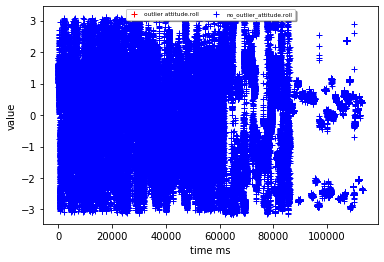

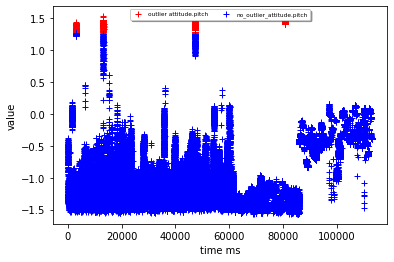

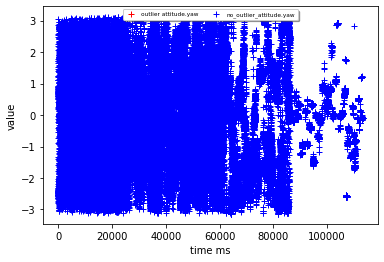

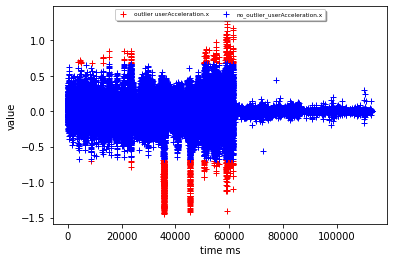

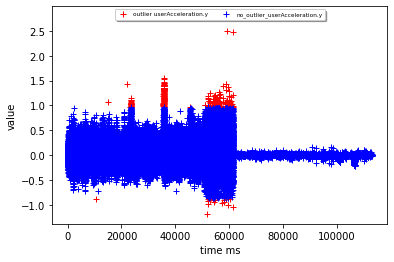

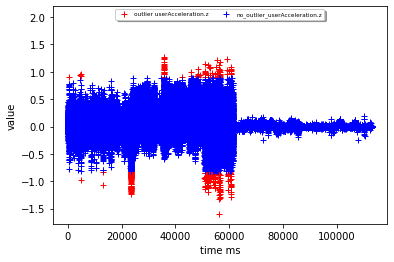

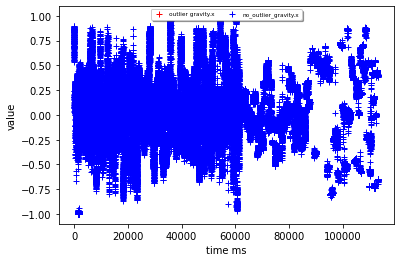

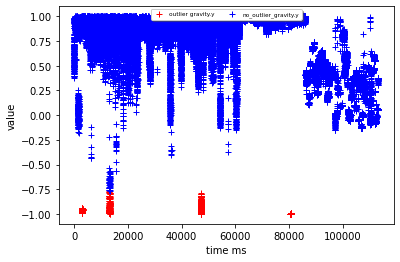

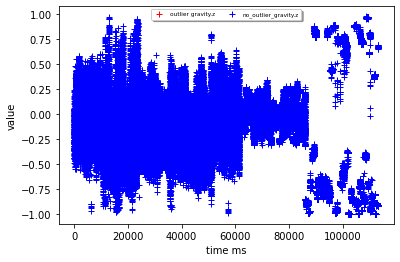

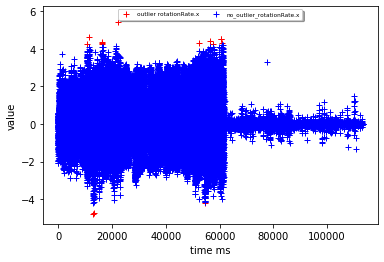

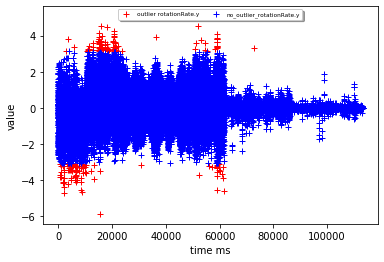

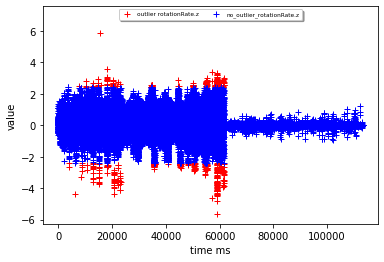

In [93]:
vis = VisualizeDataset()

for col in columns:
    vis.plot_binary_outliers(imputed_df, col, col + '_outlier')

In [ ]:
imputed_df.to_csv("dataset_imputed_values.csv")